<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/predictSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date**: June 21, 2021

**Author**: [Vennela](https://github.com/vennela28)

[Dataset](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression)

**Agenda**: Given the years of experience `YearsExperience`, predict the salary `Salary`.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/predictSalary'

/content/drive/MyDrive/predictSalary


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

# Loading the data

In [ ]:
salary = pd.read_csv('Salary_Data.csv', sep = ',')

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
salary.shape

(30, 2)

Check for any **null** values.

In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Check if there are any **duplicated rows**

In [ ]:
salary[salary.duplicated()]

,YearsExperience,Salary


Aah! no duplicated and no null values.

**Correlation** is used to describe the linear relationship between two continuous variables.
1. **Strong** Correlation: If values range from 0.5 to 1
2. **Weak** Correlation: If values range from 0 to 0.5

Correlation values range from -1 to 1. 

A **positive** correlation means that if one variable gets bigger, the other variable tends to get bigger. A **negative** correlation means that if one variable gets bigger, the other variable tends to get smaller.

Finding the correlation between the features in the dataset

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Data Visualization

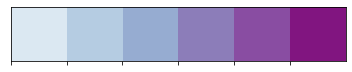

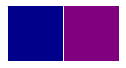

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to Purple colors
pal = sns.color_palette('BuPu', 7) #print 7 color shades from Blue to Purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#00008B', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

**Scatterplot**

In [ ]:
font = {'family': 'DejaVu Sans',
        'color': 'purple',
        'size': 18,
        }

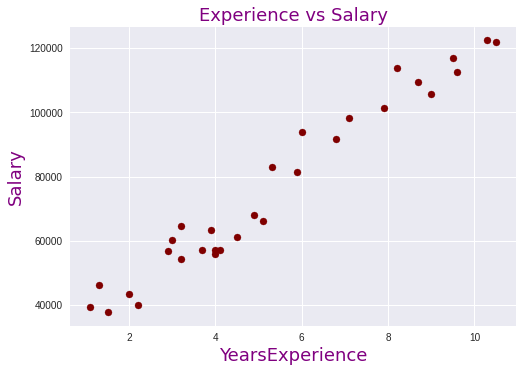

<Figure size 3600x3600 with 0 Axes>

In [ ]:
plt.scatter(salary['YearsExperience'], salary['Salary'], color = 'maroon')
plt.title('Experience vs Salary', fontdict = font)
plt.xlabel('YearsExperience', fontdict = font)
plt.ylabel('Salary', fontdict = font)
plt.figure(figsize=(50,50))
plt.show()

**Stripplot**

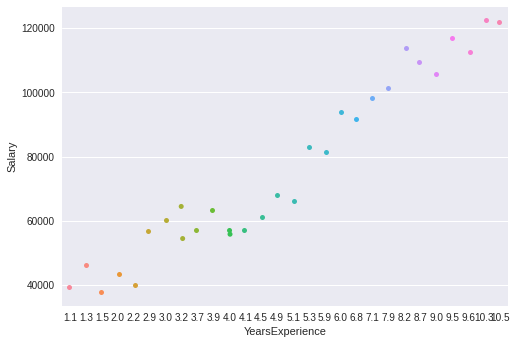

In [ ]:
sns.stripplot(x='YearsExperience', y = 'Salary', data = salary)

**Pairplots**

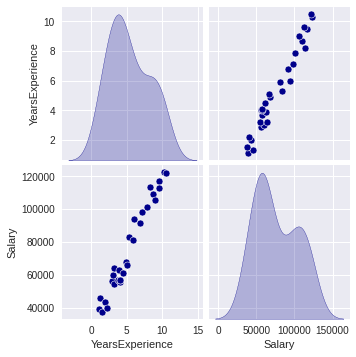

In [ ]:
sns.pairplot(x_vars=['YearsExperience', 'Salary'], y_vars=['YearsExperience', 'Salary'], data=salary, diag_kind = 'kde')

**Heatmap**

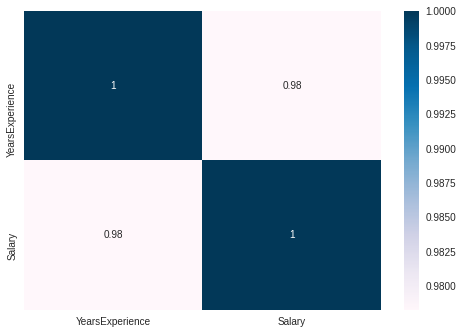

In [ ]:
sns.heatmap(salary.corr(),annot=True,cmap="PuBu")

# Model Generation

Split the Data in 70:30

In [ ]:
trainSet = salary.sample(frac=0.7, random_state=0)
testSet = salary.drop(trainSet.index)

print(trainSet.shape)
print(testSet.shape)

(21, 2)
(9, 2)


In [ ]:
trainFeatures = trainSet.copy()
testFeatures = testSet.copy()

In [ ]:
trainLabels = trainFeatures.pop('Salary')
testLabels = testFeatures.pop('Salary')

***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(trainFeatures, trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
salaryPredicted = reg.predict(testFeatures)
print(salaryPredicted)

[ 36531.86970666  44991.00782359  56269.85864618  60969.37982225
  63789.0925279   72248.23064484  82587.17723221  92926.12381958
 110784.30428867]


Compare **Actual** vs **Predicted** values

In [ ]:
compare = pd.DataFrame({"actual_Salary": testLabels, "predicted_Salary": salaryPredicted})
compare

,actual_Salary,predicted_Salary
0,39343.0,36531.869707
3,43525.0,44991.007824
7,54445.0,56269.858646
9,57189.0,60969.379822
12,56957.0,63789.092528
15,67938.0,72248.230645
19,93940.0,82587.177232
21,98273.0,92926.123820
25,105582.0,110784.304289


***Visualize the train set***

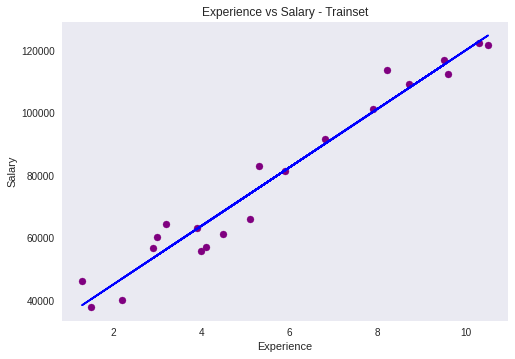

In [ ]:
plt.grid(False)
plt.scatter(trainFeatures, trainLabels, color = 'purple')
plt.plot(trainFeatures, reg.predict(trainFeatures), color = 'blue')
plt.title('Experience vs Salary - Trainset')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

***Visualize the test results***

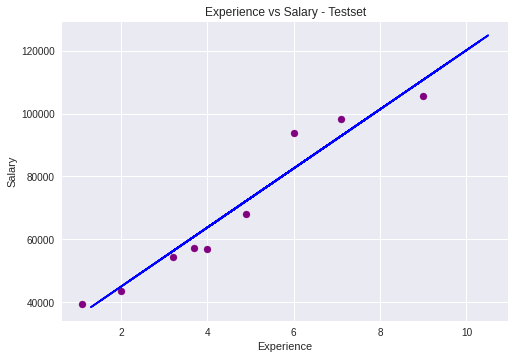

In [ ]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'purple')
plt.plot(trainFeatures, reg.predict(trainFeatures), color = 'blue')
plt.title('Experience vs Salary - Testset')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# Accuracy

In [ ]:
train = reg.score(trainFeatures, trainLabels)
print("Train Accuracy =", train * 100)
test = reg.score(testFeatures, testLabels)
print("Test Accuracy =", test * 100)

Train Accuracy = 95.92613367108218
Test Accuracy = 94.26904004416457


***Calculate the metrics***

In [69]:
from sklearn import metrics
print("Mean Squared Error:",metrics.mean_squared_error(testLabels, salaryPredicted))
print("Mean Absolute Error:",metrics.mean_absolute_error(testLabels, salaryPredicted))
print("R squared value:", reg.score(testFeatures, testLabels))

Mean Squared Error: 30829803.25145799
Mean Absolute Error: 4769.633666110542
R squared value: 0.9426904004416458


In [71]:
print("Intercept of the model:", reg.intercept_)
print("Slope of the line that fits the model:", reg.coef_)

Intercept of the model: 26192.923119286876
Slope of the line that fits the model: [9399.04235215]


**Linear Regression is all about finding the best hyperplane that best fits the given data.**

The agenda of Linear Regression is accomplished.


Hence, the best line that fits the model is ***y = 9399.04x + 26192.92***